In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


### 시장별 품목 확인
#### 시장 선정 - 등록된 가게가 많은 곳
데이터 구조: 지역 < 시장(market) < 가게(store)

In [53]:
file_path = "../data/raw/ikh_store_meta_2025-01-13.csv"
df = pd.read_csv(file_path)
df

,s_query,market,store,store_id,comments,like,rating
0,노량진,노량진 1층,군산상회,833,979,1688,4.9
1,노량진,노량진 1층,중앙꽃게,5,2962,2726,4.7
2,노량진,노량진 2층,제주회수산,822,1060,1907,4.9
3,노량진,노량진 1층,청양수산,13,5329,7007,4.9
4,노량진,노량진 1층,영신수산,6,3696,3773,4.8
...,...,...,...,...,...,...,...
442,울산,울산농수산물도매시장,거상수산,1347,0,6,0.0
443,울산,울산수암회수산시장,착한횟집,1253,3,6,3.0
444,울산,울산농수산물도매시장,산호수산,1422,7,20,5.0
445,울산,울산농수산물도매시장,울릉도횟집,989,55,54,4.9


In [96]:
df_ref = df[~df.duplicated(subset=["store_id"])]  # 중복 제거
df_ref = df_ref[df_ref["comments"] >= 100]
market_counts = df_ref.groupby("market").count()["store_id"]

# count 값이 10 이상인 market 필터링
markets = market_counts[market_counts >= 5].sort_values(ascending=False)
print(markets, '\ntotal:', markets.sum())
df_ftd = df_ref[df_ref["market"].isin(markets.index)]
df_ftd




market
노량진 1층         45
가락시장           27
노량진 2층         14
구리농수산물시장       13
강서농수산물시장       11
수원농수산물시장        9
안양평촌농수산물시장      9
인천종합연안부두어시장     9
소래포구종합어시장       6
마포농수산물시장        5
부산민락어민활어직판장     5
Name: store_id, dtype: int64 
total: 153


,s_query,market,store,store_id,comments,like,rating
0,노량진,노량진 1층,군산상회,833,979,1688,4.9
1,노량진,노량진 1층,중앙꽃게,5,2962,2726,4.7
2,노량진,노량진 2층,제주회수산,822,1060,1907,4.9
3,노량진,노량진 1층,청양수산,13,5329,7007,4.9
4,노량진,노량진 1층,영신수산,6,3696,3773,4.8
...,...,...,...,...,...,...,...
386,부산,부산민락어민활어직판장,수평선,123,559,891,4.9
388,부산,부산민락어민활어직판장,카츠교,338,790,794,4.9
390,부산,부산민락어민활어직판장,백년손님,433,395,684,4.9
412,부산,부산민락어민활어직판장,대구택이네,388,103,122,4.9


시장 선정 - 리뷰가 100건 이상 등록된 가게가 5개 이상인 시장

- 노량진 1층
- 가락시장
- 노량진 2층
- 구리농수산물시장
- 강서농수산물시장
- 수원농수산물시장
- 안양평촌농수산물시장
- 인천종합연안부두어시장
- 소래포구종합어시장
- 마포농수산물시장
- 부산민락어민활어직판장

-> 11개 시장 153 가게 대상

In [93]:
import time
today = time.strftime("%Y-%m-%d")
output_file = f"../data/processed/ikh_store_meta_{today}.csv"
df_ftd.to_csv(output_file, index=False, encoding="utf-8")

### 가격 변동 확인
품목별 데이터가 얼마나 있는지를 확인한 후 품목 결정

In [38]:
file_path = "../data/raw/ikh_price_2025-01-13.csv"
df = pd.read_csv(file_path)
df["priceDate"] = pd.to_datetime(df["priceDate"])

df.head()

,priceDate,minPrice,avgPrice,maxPrice,item,market
0,2015-03-06,30000,30000,30000,광어,노량진
1,2015-03-14,30000,30000,30000,광어,노량진
2,2015-04-18,28000,29330,30000,광어,노량진
3,2015-04-28,30000,30000,30000,광어,노량진
4,2015-06-02,30000,30000,30000,광어,노량진


In [39]:
df[df["item"] == "연어"]

,priceDate,minPrice,avgPrice,maxPrice,item,market
9542,2024-11-05,40000,40000,40000,연어,노량진
9543,2025-01-03,35000,35000,35000,연어,노량진
9544,2025-01-06,35000,35000,35000,연어,노량진


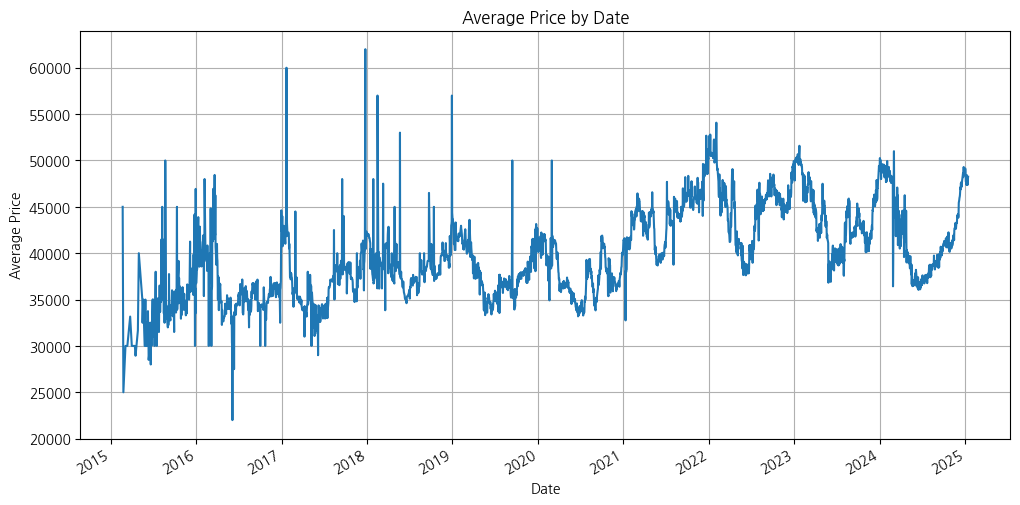

In [40]:
# 날짜별 평균 가격 시각화
df["priceDate"] = pd.to_datetime(df["priceDate"])
avg_price_by_date = df.groupby("priceDate")["avgPrice"].mean()

plt.figure(figsize=(12, 6))
avg_price_by_date.plot(title="Average Price by Date")
plt.ylabel("Average Price")
plt.xlabel("Date")
plt.grid()
plt.show()


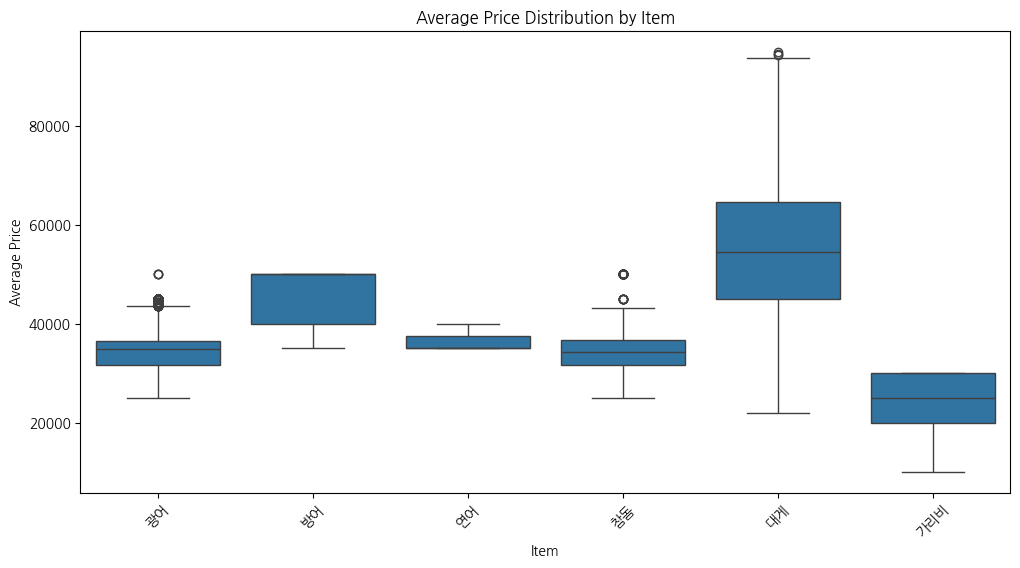

In [41]:
# 품목별 평균 가격 비교
plt.figure(figsize=(12, 6))
sns.boxplot(x="item", y="avgPrice", data=df)
plt.title("Average Price Distribution by Item")
plt.xlabel("Item")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

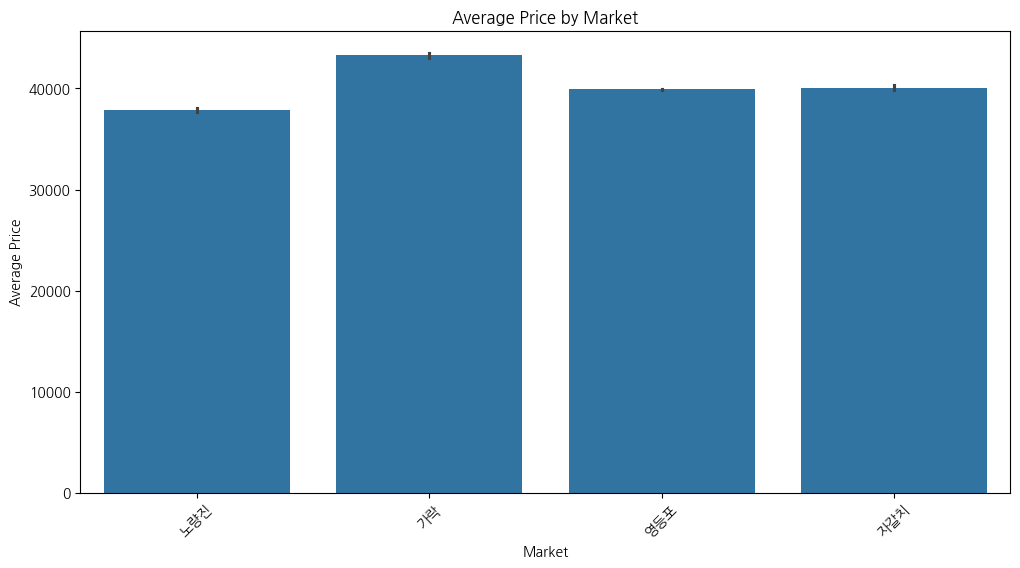

In [42]:
# 시장별 평균 가격 비교
plt.figure(figsize=(12, 6))
sns.barplot(x="market", y="avgPrice", data=df, estimator=lambda x: x.mean())
plt.title("Average Price by Market")
plt.xlabel("Market")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

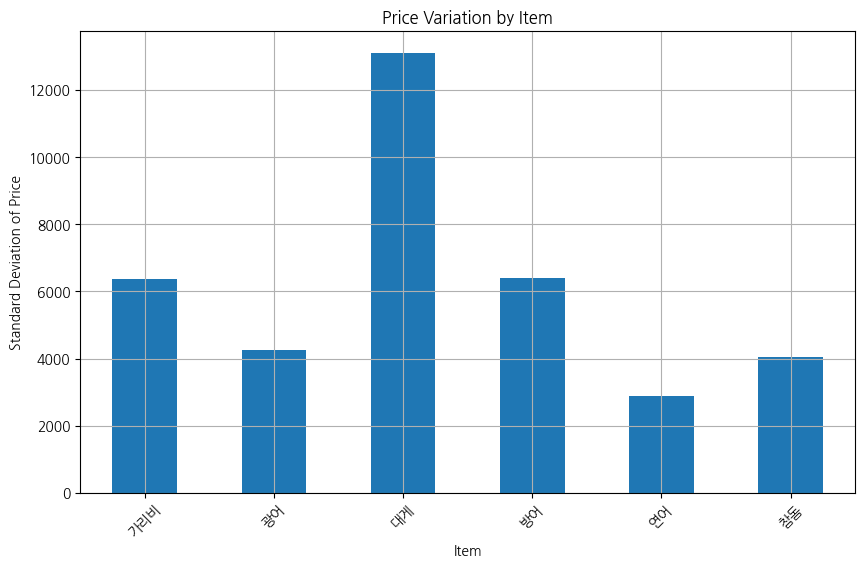

In [43]:
# 품목별 가격 변동성 확인
price_variation = df.groupby("item")["avgPrice"].std()

plt.figure(figsize=(10, 6))
price_variation.plot(kind="bar", title="Price Variation by Item")
plt.ylabel("Standard Deviation of Price")
plt.xlabel("Item")
plt.xticks(rotation=45)
plt.grid()
plt.show()

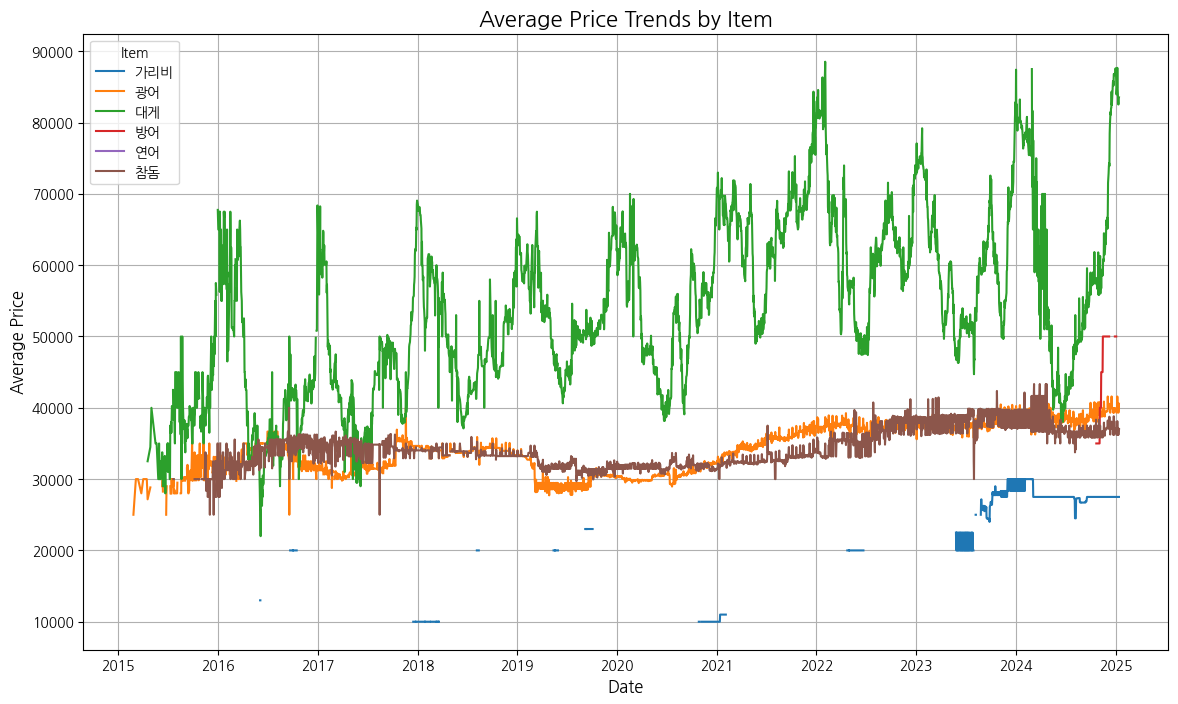

In [44]:
# 품목별 평균 가격 계산
item_price_trend = df.groupby(["priceDate", "item"])["avgPrice"].mean().unstack()

# 품목별 시간에 따른 가격 변화 플롯
plt.figure(figsize=(14, 8))
for column in item_price_trend.columns:
    plt.plot(item_price_trend.index, item_price_trend[column], label=column)

plt.title("Average Price Trends by Item", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.legend(title="Item", fontsize=10)
plt.grid()
plt.show()

In [45]:
# 전체 날짜 범위 생성
date_range = pd.date_range(start=df["priceDate"].min(), end=df["priceDate"].max())
print(f"전체날짜: {len(date_range)}")

# 품목별 누락된 날짜 찾기
missing_dates = {}

for item in df["item"].unique():
    # 해당 품목의 날짜 데이터
    item_dates = df[df["item"] == item]["priceDate"]
    
    # 누락된 날짜 계산
    missing_dates[item] = date_range.difference(item_dates)

# 누락된 날짜 출력
for item, dates in missing_dates.items():
    print(f"품목: {item} / \t누락된 날짜 수: {len(dates)}")


전체날짜: 3614
품목: 광어 / 	누락된 날짜 수: 379
품목: 방어 / 	누락된 날짜 수: 3560
품목: 연어 / 	누락된 날짜 수: 3611
품목: 참돔 / 	누락된 날짜 수: 476
품목: 대게 / 	누락된 날짜 수: 327
품목: 가리비 / 	누락된 날짜 수: 2741


In [46]:
print(f"전체날짜: {len(date_range)}")

# 품목-시장별 누락된 날짜 계산
missing_data = []
for (item, market), group in df.groupby(["item", "market"]):
    # 해당 품목-시장의 날짜 데이터
    item_market_dates = group["priceDate"]
    # 누락된 날짜 계산
    missing_dates = date_range.difference(item_market_dates)
    missing_count = len(missing_dates)
    
    # 결과 저장
    missing_data.append({"Item": item, "Market": market, "Missing Count": missing_count})
    
    # 누락된 날짜 출력
    print(f"품목: {item}, 시장: {market} / \t누락된 날짜 수: {missing_count}")


# DataFrame 생성
missing_df = pd.DataFrame(missing_data)


전체날짜: 3614
품목: 가리비, 시장: 가락 / 	누락된 날짜 수: 2955
품목: 가리비, 시장: 노량진 / 	누락된 날짜 수: 3000
품목: 광어, 시장: 가락 / 	누락된 날짜 수: 406
품목: 광어, 시장: 노량진 / 	누락된 날짜 수: 436
품목: 광어, 시장: 영등포 / 	누락된 날짜 수: 3190
품목: 광어, 시장: 자갈치 / 	누락된 날짜 수: 936
품목: 대게, 시장: 가락 / 	누락된 날짜 수: 398
품목: 대게, 시장: 노량진 / 	누락된 날짜 수: 490
품목: 대게, 시장: 영등포 / 	누락된 날짜 수: 3605
품목: 대게, 시장: 자갈치 / 	누락된 날짜 수: 1164
품목: 방어, 시장: 노량진 / 	누락된 날짜 수: 3560
품목: 연어, 시장: 노량진 / 	누락된 날짜 수: 3611
품목: 참돔, 시장: 가락 / 	누락된 날짜 수: 498
품목: 참돔, 시장: 노량진 / 	누락된 날짜 수: 611
품목: 참돔, 시장: 자갈치 / 	누락된 날짜 수: 948


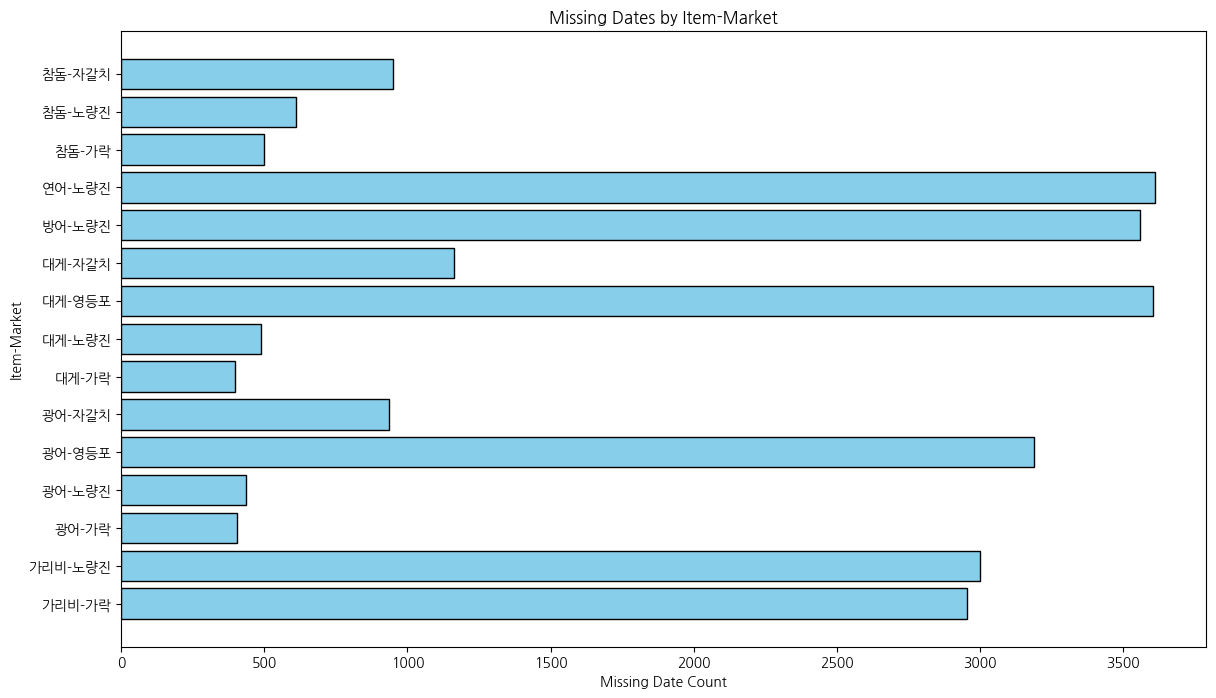

In [47]:
# 각 품목-시장별 누락된 날짜를 Gantt 스타일로 표현
fig, ax = plt.subplots(figsize=(14, 8))

for idx, ((item, market), group) in enumerate(df.groupby(["item", "market"])):
    # 전체 날짜
    all_dates = set(date_range)
    # 해당 품목-시장의 날짜
    existing_dates = set(group["priceDate"])
    # 누락된 날짜
    missing_dates = sorted(all_dates - existing_dates)
    
    # Gantt 스타일로 표시
    ax.barh(f"{item}-{market}", len(missing_dates), left=0, color="skyblue", edgecolor="black")

ax.set_title("Missing Dates by Item-Market")
ax.set_xlabel("Missing Date Count")
ax.set_ylabel("Item-Market")
plt.show()